In [24]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
import sys

In [37]:
def MSE(orj,other):
    sumError = 0
    sumError = np.array([0],dtype='int64')
    for i in range(len(orj)):
        err = orj[i][0] - other[i][0]
        sumError += err * err
    return sumError

In [6]:
def plotAudio(data):
    time = np.linspace(0., length, data.shape[0])
    plt.plot(time, data[:, 1], label="Left channel")
    plt.plot(time, data[:, 0], label="Right channel")
    plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

In [7]:
fs, data = wavfile.read('./suphi_noise.wav')
c_fs, clean_data = wavfile.read('./suphi_clean.wav')
data = np.array(data)
print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / fs
print(f"length = {length}s")

left_audio = np.array(data)
left_audio[:,0] = 0
right_audio = np.array(data)
right_audio[:,1] = 0

print(left_audio[0])
print(right_audio[0])
print(data[0])


number of channels = 2
length = 19.811632653061224s
[ 0 98]
[98  0]
[98 98]


In [8]:
wavfile.write("suphi_left.wav",fs , left_audio)
wavfile.write("suphi_right.wav",fs , right_audio)
wavfile.write("suphi_copy.wav",fs , data)

In [43]:
def denoise(data,L):
    b = (np.ones(L))/L #numerator co-effs of filter transfer function
    a = np.ones(1) #denominator co-effs of filter transfer function
    denoised = np.empty_like(data)
    y = signal.convolve(data[:, 0],b) #filter output using convolution
    y = signal.lfilter(b,a,data[:, 0]) #filter output using lfilter function

    denoised[:,1] = y
    denoised[:,0] = y
    return denoised


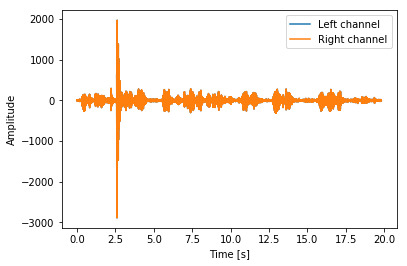

In [50]:
plotAudio(denoised)

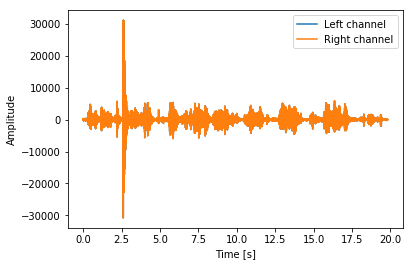

In [51]:
plotAudio(data)

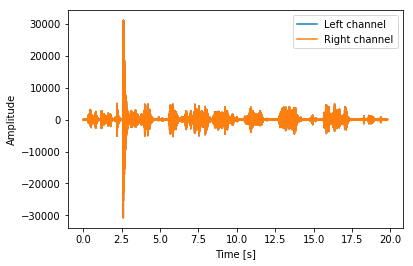

In [52]:
plotAudio(clean_data)

In [38]:
x = MSE(clean_data,denoised)
print(x)

C:\Users\Mert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in short_scalars
  


[2723087051]


In [29]:
42615.23814
1151017795
5445985091
2723087051


1151017795

In [48]:
for i in range(200,500):
    denoised = denoise(data,i)
    print(f"{i}:{MSE(clean_data,denoised)}")

C:\Users\Mert\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in short_scalars
  
C:\Users\Mert\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in short_scalars
  """


200:[1752789033]
201:[1760907379]
202:[1766312182]
203:[1746869988]
204:[1742879918]
205:[1763844700]
206:[1760721093]
207:[1740135300]
208:[1744953834]
209:[1762873365]
210:[1760758380]
211:[1747859222]
212:[1741667840]
213:[1737550405]
214:[1729424971]
215:[1749692922]
216:[1738785608]
217:[1742768559]
218:[1732176850]
219:[1733001507]
220:[1722640117]
221:[1732941054]
222:[1730130492]
223:[1720721768]
224:[1720664856]
225:[1736691497]
226:[1736134052]
227:[1743893968]
228:[1725802565]
229:[1719268740]
230:[1733797025]
231:[1729300302]
232:[1737466827]
233:[1737349832]
234:[1724966668]
235:[1705709351]
236:[1711131264]
237:[1709167651]
238:[1716265372]
239:[1715544740]
240:[1709377601]
241:[1735068930]
242:[1738291972]
243:[1731254544]
244:[1748038055]
245:[1734044327]
246:[1733500801]
247:[1727406592]
248:[1728252539]
249:[1736517911]
250:[1718125264]
251:[1725998192]
252:[1719641276]
253:[1711240193]
254:[1727288642]
255:[1730529821]
256:[1708206278]
257:[1717189326]
258:[170129521

In [49]:
wavfile.write("suphi_denoise.wav", fs, denoised)